AUSTRALIA/NEW-ZEALAND POPULATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

Dataset Preprocesing

In [4]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Nigeria
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 927 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [320]:
both_2010_2050_medium_fertility

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,23536.254,20633.118,18395.553,16597.754,14347.946,11846.544,9038.291,6934.571,5577.907,4696.548,...,3342.206,2503.389,1939.419,1318.804,770.248,357.493,117.686,24.590,2.779,0.179
2015,24428.869,21998.541,20021.189,18011.296,16126.140,13638.176,10978.002,8258.943,6333.158,5118.582,...,3647.454,2967.799,2114.100,1500.455,888.825,415.272,139.253,29.897,3.701,0.233
2020,24673.591,23058.194,21424.168,19638.222,17541.559,15401.009,12714.093,10097.222,7589.279,5841.821,...,3940.975,3257.035,2525.066,1653.889,1025.672,488.853,165.907,36.399,4.625,0.317
2025,24509.168,23495.548,22555.217,21057.531,19168.382,16822.522,14455.475,11782.313,9341.973,7042.013,...,4336.778,3540.486,2791.960,1996.838,1148.702,575.657,200.394,44.662,5.796,0.407
2030,24367.633,23513.987,23067.754,22213.710,20599.241,18452.632,15884.319,13499.509,10985.188,8728.031,...,5003.669,3921.136,3059.206,2231.112,1407.797,657.988,242.085,55.542,7.321,0.523
2035,24347.619,23520.879,23155.074,22758.671,21775.610,19906.818,17526.325,14936.451,12674.316,10328.996,...,6101.757,4552.908,3414.381,2470.606,1594.922,822.199,283.630,68.977,9.359,0.674
2040,24300.004,23626.174,23219.651,22880.340,22351.527,21123.530,19019.131,16596.429,14119.466,11991.209,...,7648.023,5585.194,3994.976,2785.644,1790.783,948.744,362.703,82.983,11.925,0.880
2045,24050.173,23691.277,23372.684,22976.137,22511.317,21757.451,20297.952,18133.854,15794.514,13439.022,...,9148.228,7041.895,4934.898,3292.341,2046.259,1083.957,427.780,108.755,14.703,1.142
2050,23574.447,23545.714,23479.061,23156.310,22644.040,21986.103,21021.099,19481.162,17369.229,15120.213,...,10729.652,8468.845,6265.069,4103.008,2448.580,1258.645,498.713,131.186,19.693,1.436


In [321]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,5476.400,4397.150,3796.060,3295.530,2865.020,2487.200,2132.720,1780.730,1512.020,1280.870,...,929.330,695.710,478.200,291.570,145.480,64.321,-,-,-,-
1955,6559.498,4754.909,4194.862,3661.738,3159.712,2724.308,2352.728,2002.973,1656.819,1392.329,...,1006.190,782.447,542.635,328.302,164.969,74.194,-,-,-,-
1960,7357.623,5747.280,4548.898,4054.385,3518.213,3012.049,2584.238,2216.730,1870.450,1531.905,...,1030.968,853.585,616.629,378.263,189.975,86.622,-,-,-,-
1965,8265.085,6505.304,5513.648,4405.160,3903.564,3362.051,2865.086,2442.711,2077.706,1736.467,...,1132.129,881.370,679.717,436.450,223.809,102.843,-,-,-,-
1970,9345.081,7372.673,6256.337,5346.122,4243.926,3732.656,3200.579,2712.765,2296.034,1935.509,...,1258.030,975.244,709.365,488.647,264.149,124.539,-,-,-,-
1975,10707.805,8413.879,7111.894,6079.904,5164.039,4070.445,3565.468,3041.835,2560.281,2148.486,...,1440.130,1092.219,793.349,518.050,302.477,152.055,-,-,-,-
1980,12519.216,9779.885,8191.717,7010.980,6022.645,5117.223,4037.988,3492.510,2927.756,2437.651,...,1632.952,1262.515,899.011,588.169,327.368,182.639,-,-,-,-
1985,14819.258,11403.398,9442.258,7928.146,6699.557,5695.283,4814.619,3793.661,3283.937,2736.233,...,1830.837,1434.358,1044.219,671.445,375.074,210.551,-,-,-,-
1990,16900.950,13618.560,11070.038,9214.166,7681.095,6440.670,5455.668,4595.850,3602.269,3096.619,...,2057.544,1616.561,1193.830,785.918,432.673,244.535,-,-,-,-


TASK 1

Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)


In [288]:
# def get_survival_rate(dataset, start_year, end_year):
#     """
#     Calculates the survival rate for each age group over a specified period.

#     The survival rate is calculated as the ratio of the population at the end of the period to 
#     the population at the start of the period for each age group, with the start_year population 
#     shifted one age group. 

#     Note: The '0 - 4' age group is dropped because this group does not have a preceding age 
#     group from which to calculate a survival rate.

#     Args:
#     dataset (pd.DataFrame): The dataset to calculate survival rates from.
#     start_year (int): The start year of the period.
#     end_year (int): The end year of the period.

#     Returns:
#     pd.DataFrame: A DataFrame with survival rates for each age group.
#     """
#     return pd.DataFrame(dataset.loc[end_year] / dataset.loc[start_year].shift(periods = 1), columns = [end_year]).drop('0 - 4').T


In [5]:
def get_survival_rate(dataset, start_year, end_year):
    start_pop = dataset.loc[start_year]
    end_pop = dataset.loc[end_year]

    # Replace non-numeric values with NaN
    start_pop = pd.to_numeric(start_pop, errors='coerce')
    end_pop = pd.to_numeric(end_pop, errors='coerce')

    # Shift the start population down by one
    start_pop_shifted = start_pop.shift(periods = 1)

    # Calculate the survival rate, handling possible division by zero
    survival_rate = np.where(start_pop_shifted != 0, end_pop / start_pop_shifted, np.nan)

    # Convert numpy array to pandas Series
    survival_rate_series = pd.Series(survival_rate, index=start_pop.index)

    survival_rate_df = survival_rate_series.to_frame(end_year)

    # Drop '0 - 4' row if it exists
    if '0 - 4' in survival_rate_df.index:
        survival_rate_df = survival_rate_df.drop('0 - 4')

    return survival_rate_df.T


In [353]:
get_survival_rate(male_1950_2005_estimates, 1995, 2000)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2000,1.056137,1.039858,1.012921,0.965453,0.978536,1.028951,1.029403,1.011787,1.005166,1.000313,0.9843,0.95857,0.929904,0.889823,0.826119,0.715716,0.555416,0.380615,0.263717,0.199839


In [354]:
get_survival_rate(male_1950_2005_estimates, 2000, 2005)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1.016097,1.010998,1.023469,1.047875,1.059838,1.04832,1.032224,1.018708,1.008314,0.998256,0.984983,0.966617,0.93744,0.891362,0.820329,0.718454,0.578153,0.412859,0.286443,0.206897


In [355]:
get_survival_rate(male_1950_2005_estimates, 1990, 1995)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
1995,1.062064,1.055311,1.050482,0.95533,1.000261,1.007877,1.01598,1.024017,0.978391,0.987651,0.969997,0.954672,0.896293,0.832291,0.773008,0.617803,0.317145,NaN,NaN,NaN


In [356]:
get_survival_rate(male_1950_2005_estimates, 1985, 1990)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
1990,1.014871,1.042,1.055889,0.985512,1.023406,1.043447,1.032809,1.059169,1.003411,0.991417,0.965082,0.949828,0.92322,0.832147,0.772628,0.977902,NaN,NaN,NaN,NaN


In [6]:
def min_max_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min and max survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)

    return min_survival_rates, max_survival_rates

# Call the function
min_survival_rate, max_survival_rate = min_max_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64


In [358]:
def plot_survival_rates(dataset, years, gender='men'):

    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    # For each start year in the given list...
    for year in years:
        # ...calculate the survival rate for the 5-year period starting from that year
        survival_rate = get_survival_rate(dataset, year, year + 5)

        # Plot the survival rate as a line on the figure
        plt.plot(survival_rate.T, label=f'{year}-{year+5}', linestyle='-', marker='o', markersize=8)

    # Set the title of the figure (includes the gender)
    plt.title(f'Survival rate for {gender}')
    
    # Set the label for the x-axis
    plt.xlabel('Age group')

    # Set the label for the y-axis
    plt.ylabel('Survival rate')

    # Display the legend (shows which line corresponds to which year)
    plt.legend()

    # Show the figure
    plt.show()


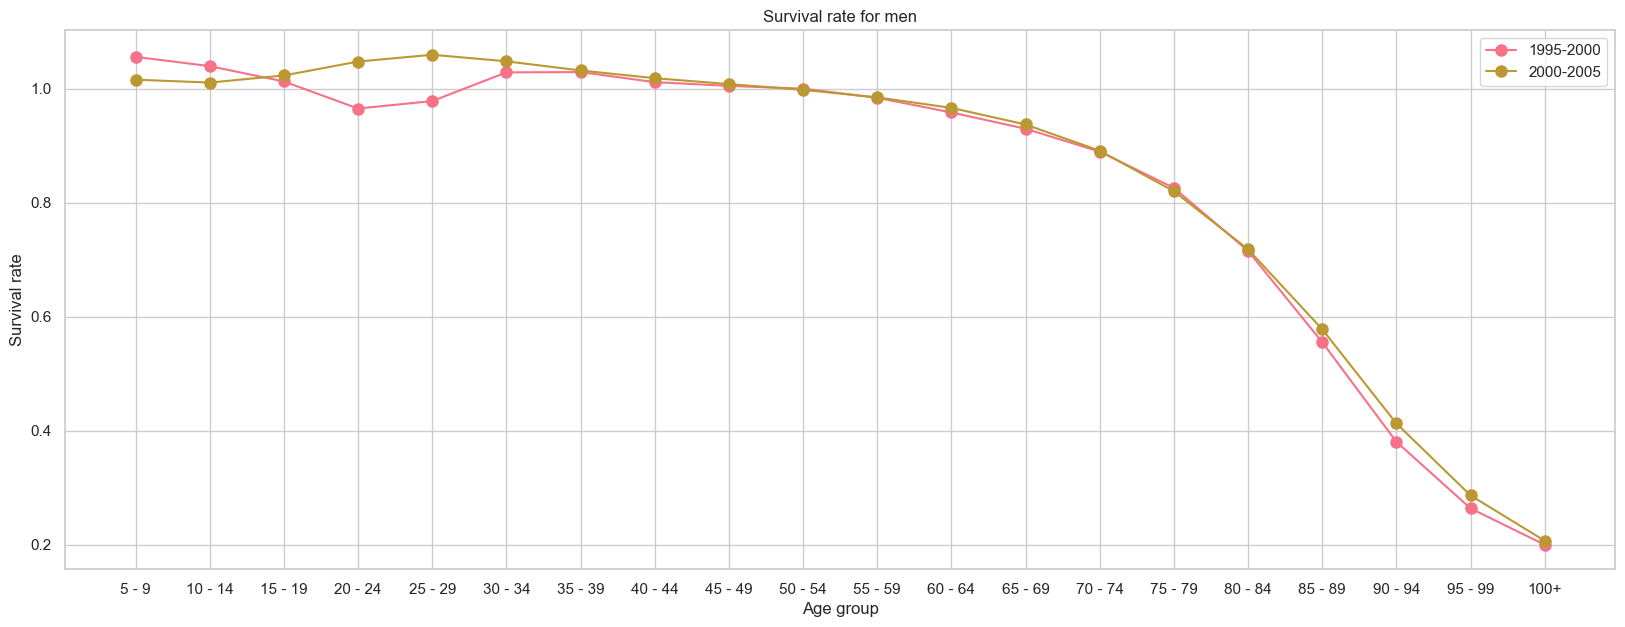

In [359]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = male_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(male_1950_2005_estimates, years_to_plot, 'men')

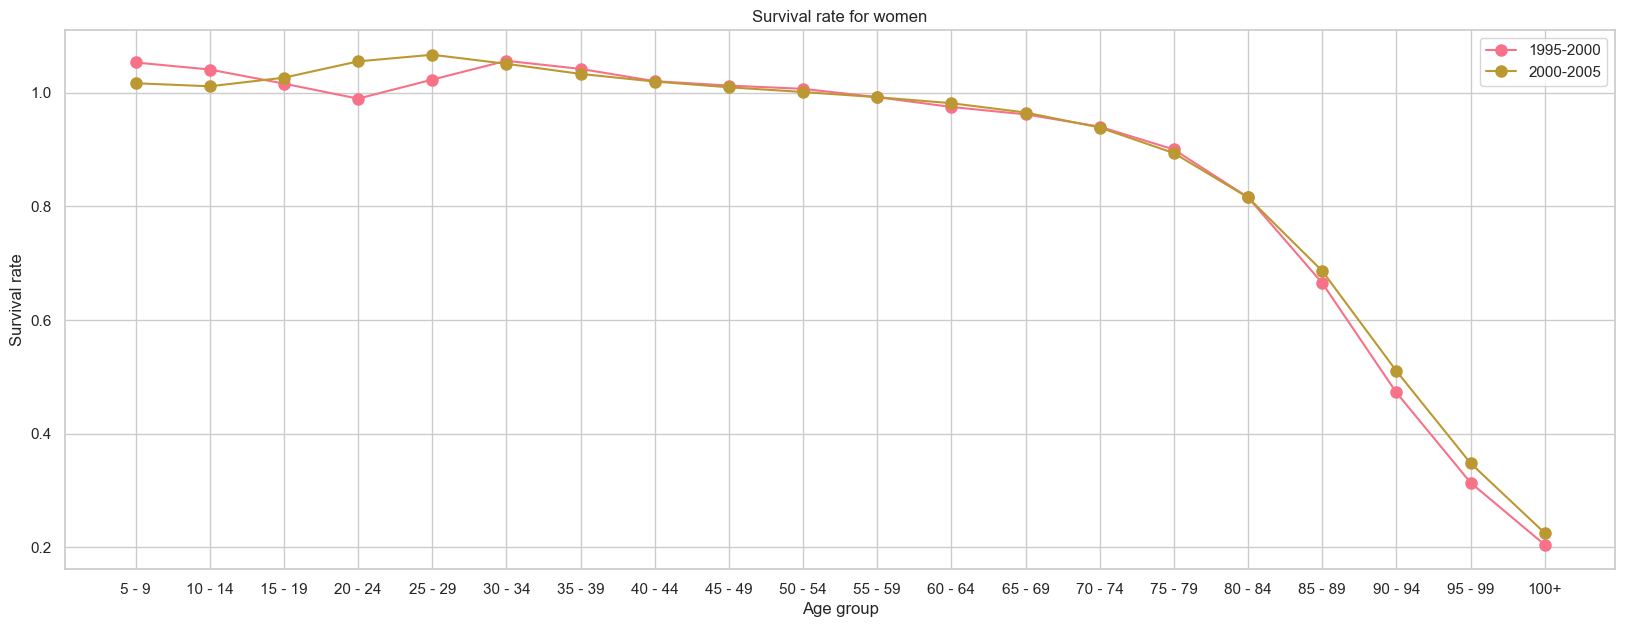

In [360]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_1950_2005_estimates, years_to_plot, 'women')

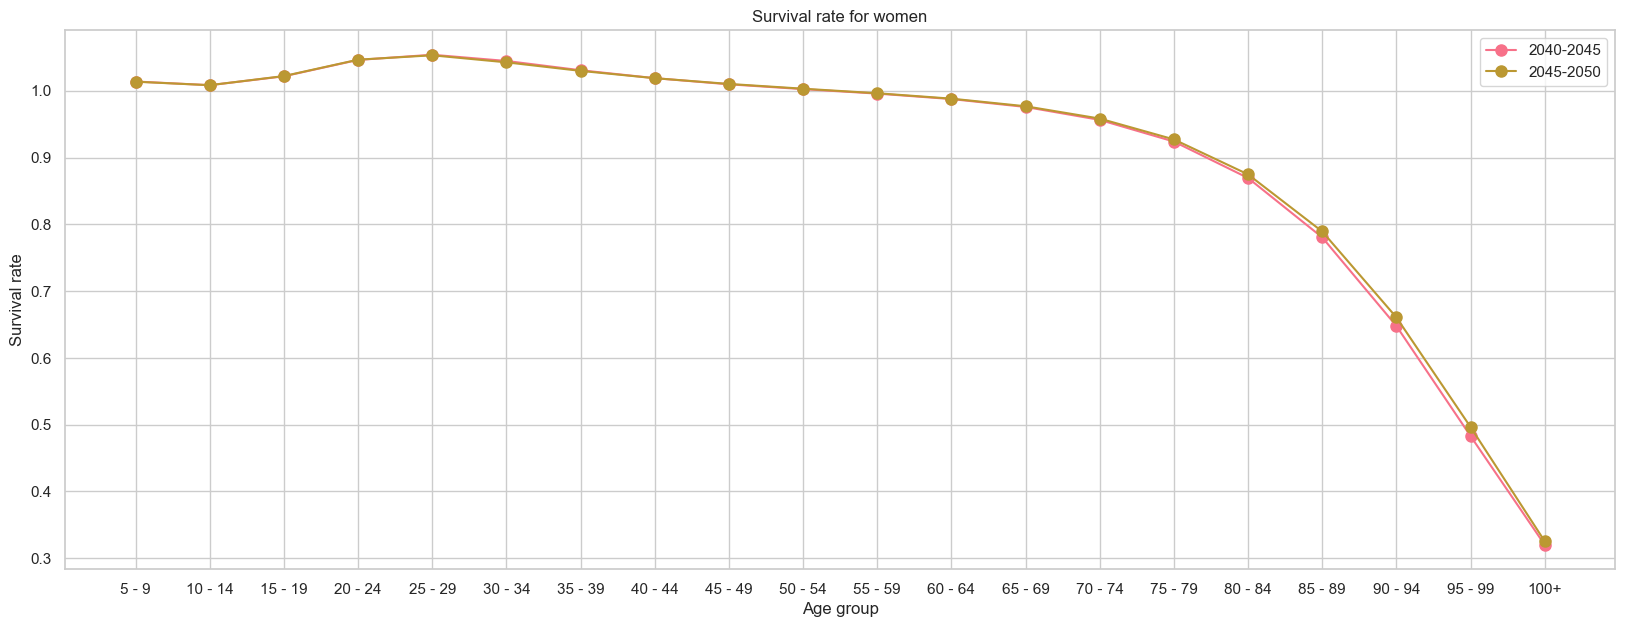

In [361]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_2010_2050_medium_fertility.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_2010_2050_medium_fertility, years_to_plot, 'women')

Task 2

Determine the fertility rate for women in the age category “'20 - 24', '25 - 29', '30 - 34', '35 - 39'”

In [7]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [8]:
def get_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    fertility_rates = {}

    for year in range(start_year, end_year, 5):
        children_population = dataset_children.loc[year, child_age_group]
        women_population = dataset_women.loc[year, women_age_groups].sum()

        fertility_rate = children_population / women_population if women_population != 0 else np.nan
        fertility_rates[year] = fertility_rate

    return pd.Series(fertility_rates, name='fertility_rate')

In [9]:
fertility_rates = get_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2010, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49'])
fertility_rates

1950    0.448594
1955    0.464512
1960    0.474853
1965    0.453801
1970    0.411390
1975    0.387202
1980    0.312804
1985    0.302430
1990    0.283223
1995    0.277150
2000    0.267396
2005    0.250215
Name: fertility_rate, dtype: float64

In [380]:
min(fertility_rates)

0.25021521729655616

In [381]:
max(fertility_rates)

0.47485262597929834

In [365]:
# Usage:
child_age_group = '0 - 4'
women_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']

get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

0.3572446699182366

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    """
    Plot the fertility rate over a range of years.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - start_year, end_year: The range of years to plot fertility rates for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))
    fertility_rates = []

    for year in years:
        fertility_rate = get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups)
        fertility_rates.append(fertility_rate)
    
    # Plot the fertility rates as a line on the figure
    plt.plot(years, fertility_rates, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Fertility rate from {start_year} to {end_year}')
    
    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Fertility rate')

    # Show the figure
    plt.show()


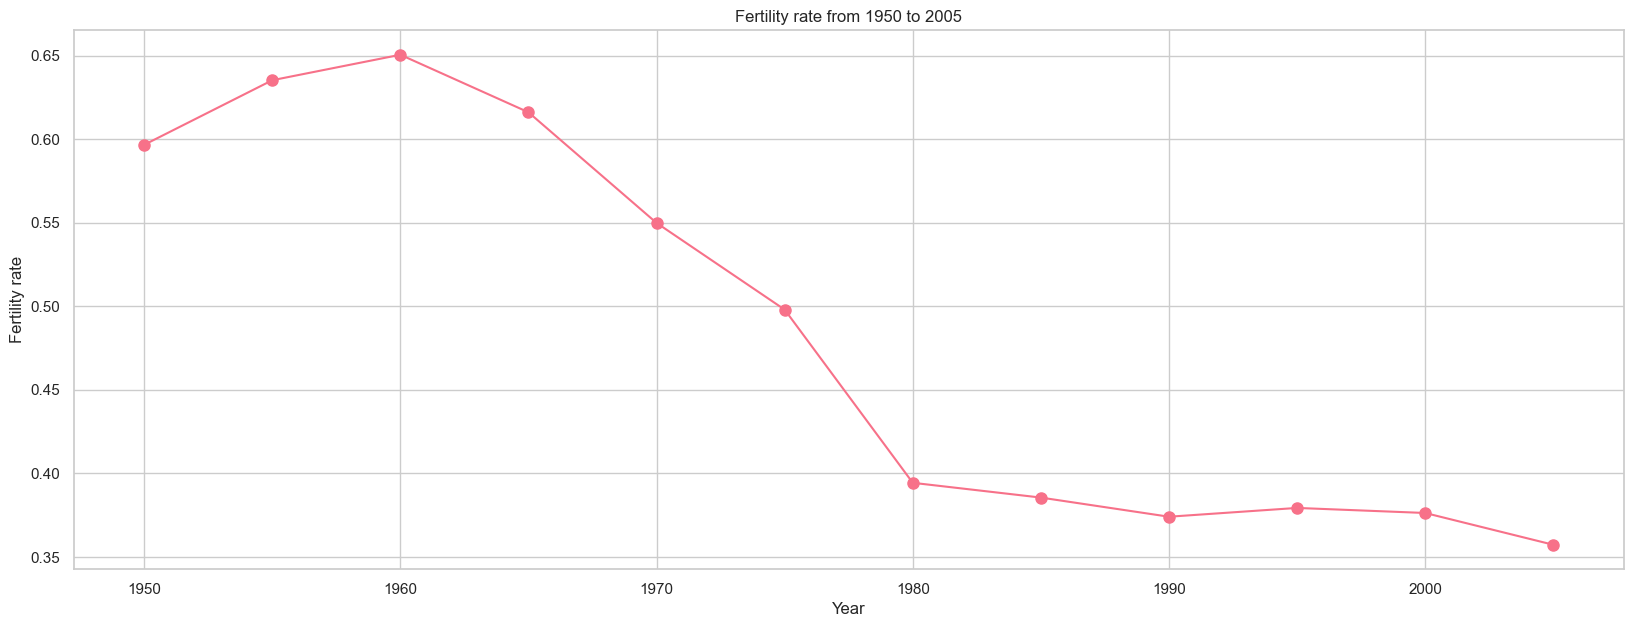

In [367]:
plot_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, child_age_group, women_age_groups)


Task 3

Calculate boys/girls ratio for newborn children

Min and max boys/girls ratio
1.0456637623954914
1.0550396672931748


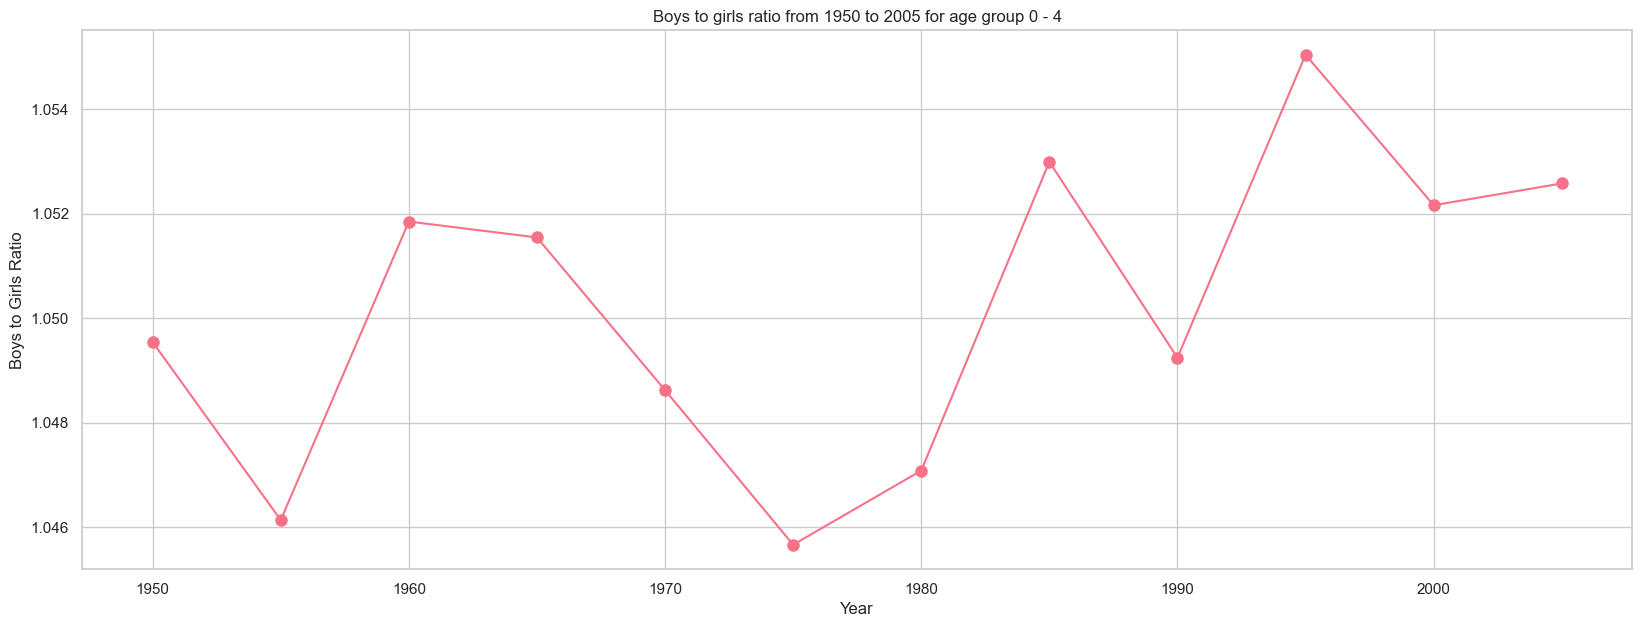

In [383]:
def plot_gender_ratio(dataset_men, dataset_women, start_year, end_year, age_group):
    """
    Plot the boys to girls ratio over a range of years.

    Parameters:
    - dataset_men: DataFrame containing population data for boys/men.
    - dataset_women: DataFrame containing population data for girls/women.
    - start_year, end_year: The range of years to plot gender ratios for.
    - age_group: The age group to consider (e.g., '0 - 4').
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))  # Adjust this line to account for 5-year intervals
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    print("Min and max boys/girls ratio")
    print(min(gender_ratios))
    print(max(gender_ratios))

    # Plot the gender ratios as a line on the figure
    plt.plot(years, gender_ratios, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Boys to girls ratio from {start_year} to {end_year} for age group {age_group}')

    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Boys to Girls Ratio')

    # Show the figure
    plt.show()

# Call the function with appropriate arguments:
plot_gender_ratio(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


Task 4

Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!


In [10]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [340]:
get_boy_prob(2005)

0.5127330281180665

In [370]:
# def generate_population_projection(age_groups, start_year, end_year, survival_rate, fertility, girl_probability, boy_probability, female_estimates, male_estimates, both_estimates, fertility_age_groups):
#     """
#     This function generates population projections based on the given parameters.

#     Parameters:
#     age_groups (list): Age groups to consider in the simulation.
#     start_year (int): Year to start the simulation.
#     end_year (int): Year to end the simulation.
#     survival_rate (float): The survival rate used for simulation.
#     fertility (float): The fertility rate used for simulation.
#     girl_probability (float): The probability of a newborn being a girl.
#     boy_probability (float): The probability of a newborn being a boy.
#     female_estimates (pd.DataFrame): The initial population estimates for females.
#     male_estimates (pd.DataFrame): The initial population estimates for males.
#     both_estimates (pd.DataFrame): The initial population estimates for both genders.
#     fertility_age_groups (list): Age groups that can contribute to fertility.

#     Returns:
#     population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
#     """
    
#     # Create a list of years for which the simulation will run
#     years = list(range(start_year, end_year+1, 5))

#     # Initialize the DataFrame for storing the population projections
#     population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
#     # Populate the projections for the start year with initial population estimates
#     population_projections.loc[start_year] = both_estimates.loc[start_year]
    
#     # For each year in the simulation...
#     for i in range(len(years) -1):
#         # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
#         f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
#         # Compute the remaining female population based on survival rate and previous year's population
#         f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
#         # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
#         m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
#         # Compute the remaining male population based on survival rate and previous year's population
#         m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
        
#         # Update the population projections with the computed values for newborns and remaining population
#         population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
#         population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

#     # Return the final population projections
#     return population_projections


In [11]:
def generate_population_projection(fertility, boy_probability, survival_rate, forecast_years):
    """
    This function generates population projections based on the given parameters.

    Parameters:
    survival_rate (float): The survival rate used for simulation.
    fertility (float): The fertility rate used for simulation.
    boy_probability (float): The probability of a newborn being a boy.
    forecast_years (list): The years for which to generate forecasts.

    Returns:
    population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
    """

    # Year to start the simulation
    start_year = 2005

    # Year to end the simulation
    end_year = max(forecast_years)

    # Age groups to consider in the simulation
    age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
                '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
    
    # Age groups that can contribute to fertility
    fertility_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']
    
    girl_probability = 1 - boy_probability

    # The initial population estimates for females
    female_estimates = female_1950_2005_estimates.copy()

    # The initial population estimates for males
    male_estimates = male_1950_2005_estimates.copy()

    # The initial population estimates for both genders
    both_estimates = both_1950_2005_estimates.copy()
    
    # Create a list of years for which the simulation will run
    years = list(range(start_year, end_year+1, 5))

    # Initialize the DataFrame for storing the population projections
    population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
    # Populate the projections for the start year with initial population estimates
    population_projections.loc[start_year] = both_estimates.loc[start_year]
    
    # For each year in the simulation...
    for i in range(len(years) -1):
        # Only compute forecasts for the specified years
        if years[i+1] in forecast_years:
            # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
            f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
            # Compute the remaining female population based on survival rate and previous year's population
            f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
            # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
            m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
            # Compute the remaining male population based on survival rate and previous year's population
            m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
            
            # Update the population projections with the computed values for newborns and remaining population
            population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
            population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

    # Filter the final DataFrame to only include the forecast years
    population_projections = population_projections.loc[forecast_years]
    
    # Return the final population projections
    return population_projections


In [26]:
# Model's parameters

# The survival rate used for simulation. Here, it is fetched from another function `get_survival_rate`
survival_rate = get_survival_rate(both_1950_2005_estimates, 2000, 2005).loc[2005]

fertility_rate = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39'])

# The probability of a newborn being a boy, fetched from another function `get_boy_prob`
boys_ratio = get_boy_prob(2005)

# forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

# forecast_years = [2005, 2010, 2015]

forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105]


# Model's Execution

# Call the `generate_population_projection` function to run the simulation 
# The function uses the parameters defined above to simulate the population projections
population_projections = generate_population_projection(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years,
)

In [27]:
population_projections

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1527.097,1599.687,1688.819,1715.322,1686.743,1623.45,1719.628,1799.881,1822.688,1759.714,...,1463.548,1114.879,880.007,723.539,633.739,457.353,240.393,93.34,22.118,3.423
2010,1526.312547,1552.274975,1617.702997,1731.080726,1803.741244,1793.70456,1704.188532,1775.993879,1834.607622,1839.185879,...,1589.898968,1425.68835,1060.731498,805.880055,621.825686,490.395597,295.062611,115.084051,30.96122,4.89335
2015,1573.860524,1551.477588,1569.757008,1658.185085,1820.31228,1918.122023,1882.910309,1760.048336,1810.259627,1851.213391,...,1739.54274,1548.77082,1356.445443,971.381317,692.59144,481.176917,316.380138,141.256195,38.173801,6.84981
2020,1615.488236,1599.809511,1568.950641,1609.039275,1743.659108,1935.743879,2013.515386,1944.628247,1794.006433,1826.645012,...,1818.103649,1694.543546,1473.550038,1242.185947,834.826946,535.936391,310.43268,151.461598,46.855197,8.445509
2025,1652.66243,1642.123559,1617.826888,1608.21273,1691.979992,1854.229894,2032.013625,2079.51429,1982.147599,1810.244704,...,1829.993291,1771.07221,1612.242867,1349.426296,1067.562534,646.000102,345.760913,148.614354,50.240366,10.366167
2030,1656.17315,1679.910661,1660.617485,1658.312077,1691.110841,1799.273646,1946.44573,2098.618864,2119.636114,2000.088811,...,1805.706535,1782.654286,1685.054682,1476.436405,1159.727301,826.09397,416.768834,165.527143,49.295925,11.115097
2035,1643.380971,1683.479265,1698.830153,1702.173484,1743.792645,1798.349379,1888.75636,2010.246228,2139.109288,2138.821789,...,1789.494221,1758.995789,1696.07424,1543.114953,1268.882644,897.412282,532.956914,199.520975,54.905959,10.90615
2040,1634.501389,1670.476174,1702.438947,1741.342402,1789.914965,1854.371899,1887.786127,1950.66592,2049.031604,2158.471223,...,1977.162182,1743.202862,1673.56479,1553.206284,1326.187688,981.878126,578.96813,255.144037,66.181837,12.147305
2045,1649.146541,1661.450191,1689.289413,1745.041504,1831.102913,1903.418976,1946.594797,1949.663884,1988.301763,2067.57821,...,2114.304891,1926.016153,1658.538894,1532.592906,1334.860405,1026.221525,633.461513,277.171122,84.632211,14.641962
2050,1676.493822,1676.336805,1680.161777,1731.562911,1834.992692,1947.218779,1998.081118,2010.400182,1987.280394,2006.298679,...,2133.729086,2059.611198,1832.473299,1518.832709,1317.144804,1032.932587,662.069786,303.258901,91.938675,18.723892


In [19]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

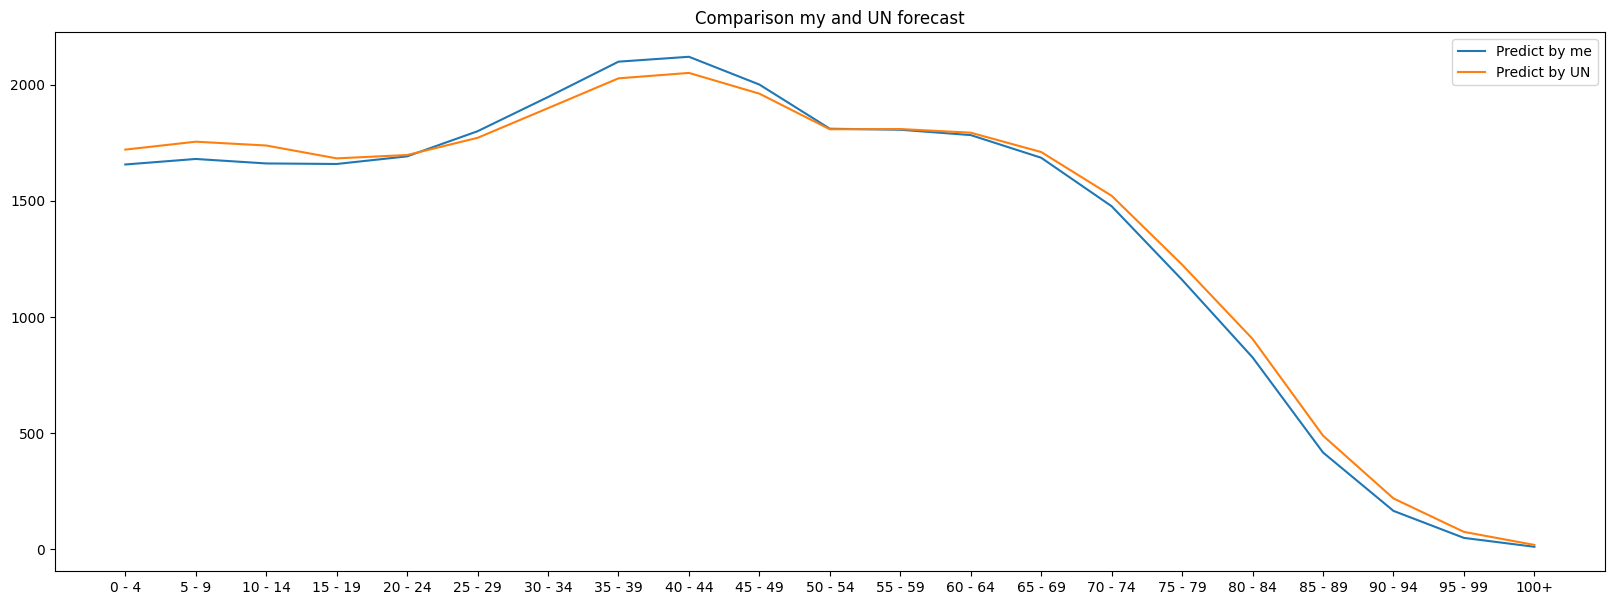

In [20]:
plot_comparison(2030)

# A timeseries for population vs time-period

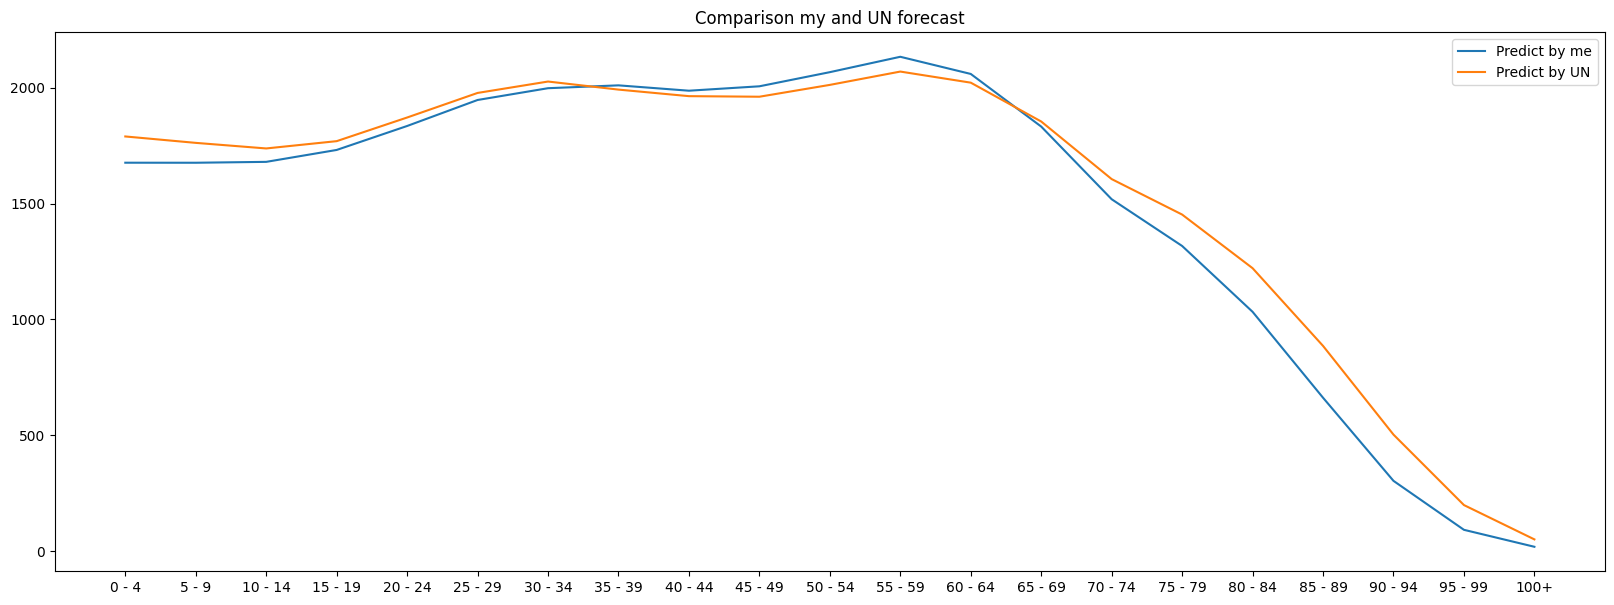

In [21]:
plot_comparison(2050)

Sensitivity Analysis (TASK 2)

In [314]:
!pip3 install salib

In [315]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import random,math

Q. 1

Perform a sensitivity analysis for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.


In [415]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

# Min survival rates for each age group: 
#  5 - 9      0.995665
# 10 - 14    1.010998
# 15 - 19    1.000360
# 20 - 24    0.955330
# 25 - 29    0.978536
# 30 - 34    1.007877
# 35 - 39    1.013228
# 40 - 44    1.011412
# 45 - 49    0.978391
# 50 - 54    0.957093
# 55 - 59    0.938359
# 60 - 64    0.887035
# 65 - 69    0.838299
# 70 - 74    0.747494
# 75 - 79    0.658797
# 80 - 84    0.617803
# 85 - 89    0.317145
# 90 - 94    0.380615
# 95 - 99    0.263717
# 100+       0.199839
# dtype: float64

# Max survival rates for each age group: 
#  5 - 9      1.062064
# 10 - 14    1.055311
# 15 - 19    1.055889
# 20 - 24    1.084572
# 25 - 29    1.114911
# 30 - 34    1.079730
# 35 - 39    1.052005
# 40 - 44    1.059169
# 45 - 49    1.013456
# 50 - 54    1.000313
# 55 - 59    0.984983
# 60 - 64    0.966617
# 65 - 69    0.937440
# 70 - 74    0.891362
# 75 - 79    0.826119
# 80 - 84    0.977902
# 85 - 89    0.578153
# 90 - 94    0.412859
# 95 - 99    0.286443
# 100+       0.206897

#Minimum and Maximum Fertility rate from 1950 to 2005
0.25021521729655616, 0.47485262597929834

# Min and max boys/girls ratio
# 1.0456637623954914
# 1.0550396672931748

problem = {
    'num_vars': 9,  # Corrected the number of variables
    'names': ['fertility_rate', 'boys_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    'bounds': [
        [0.250, 0.475], 
        [1.046, 1.055],
        [0.995, 1.062], 
        [1.011, 1.055], 
        [1.000, 1.056], 
        [0.955, 1.085], 
        [0.979, 1.115], 
        [1.008, 1.080], 
        [1.013, 1.052]
    ]
}

def Evaluate(param_values):
    Y = []

    for params in param_values:
        fertility_rate = params[0]
        boys_ratio = params[1]
        survival_rate_partial = params[2:9]  # Corrected the range to include all survival rate variables
        survival_rate = np.ones(21)
        survival_rate[1:8] = survival_rate_partial  # Corrected the range to include '35 - 39' group

        res = generate_population_projection(
                fertility = fertility_rate,
                boy_probability = boys_ratio,
                survival_rate = survival_rate,
        )
        
        total_population_last_year = res.iloc[-1].sum()
        Y.append(total_population_last_year)
    
    return np.array(Y)

param_values = saltelli.sample(problem, 500)
Y = Evaluate(param_values)
Si = sobol.analyze(problem, Y, print_to_console=False)
print("__________________")
print(Si['S1'])


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/3223253918.py:94: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)


__________________
[ 9.07871309e-01 -1.83636489e-04  8.15170285e-03  6.13428885e-03
  1.22310790e-02  2.43069725e-02  2.08386997e-02  2.52088344e-03
  5.89722361e-04]


In [422]:
!pip3 install scikit-learn

  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/3106444887.py:17: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)
/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/3106444887.py:17: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warning

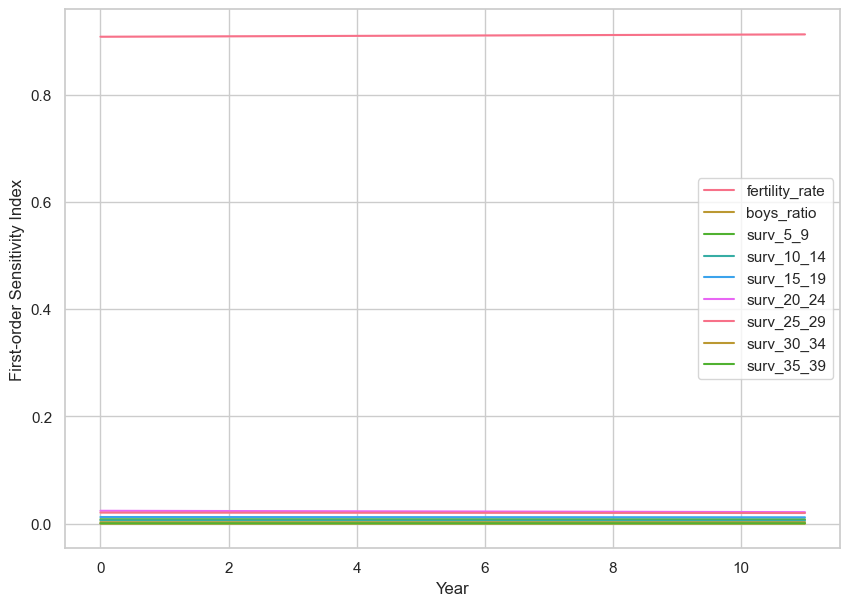

In [426]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Repeat the sensitivity analysis, collect the results
num_repeats = 12  # Number of times to repeat the analysis
all_S1 = []

for _ in range(num_repeats):
    # Add a small random noise to the bounds
    for bound in problem['bounds']:
        noise = np.random.uniform(-0.01, 0.01)  # Adjust the magnitude of noise as needed
        bound[0] += noise
        bound[1] += noise
    
    param_values = saltelli.sample(problem, 500)
    Y = Evaluate(param_values)
    Si = sobol.analyze(problem, Y, print_to_console=False)
    all_S1.append(Si['S1'])

# for _ in range(num_repeats):
#     param_values = saltelli.sample(problem, 500)
#     Y = Evaluate(param_values)
#     Si = sobol.analyze(problem, Y, print_to_console=False)
#     all_S1.append(Si['S1'])

all_S1 = np.array(all_S1)  # Shape: (num_repeats, num_vars)

# Fit a linear model for each parameter
x = np.arange(num_repeats).reshape(-1, 1)
model = LinearRegression()

# Collect slopes and intercepts
slopes = []
intercepts = []

for i in range(problem['num_vars']):
    y = all_S1[:, i]
    model.fit(x, y)
    slopes.append(model.coef_[0])
    intercepts.append(model.intercept_)

# Calculate confidence intervals
conf_intervals = []
for i in range(problem['num_vars']):
    y = all_S1[:, i]
    stderr = stats.sem(y)
    interval = stderr * stats.t.ppf((1 + 0.95) / 2., num_repeats-1)
    conf_intervals.append(interval)

# Now you can plot the lines with confidence intervals
plt.figure(figsize=(10, 7))

for i in range(problem['num_vars']):
    y_pred = slopes[i] * x + intercepts[i]
    plt.plot(x, y_pred, label=problem['names'][i])
    plt.fill_between(x.flatten(), (y_pred-conf_intervals[i]).flatten(), (y_pred+conf_intervals[i]).flatten(), alpha=0.3)

plt.xlabel('Year')
plt.ylabel('First-order Sensitivity Index')
plt.legend()
plt.show()


In [427]:
all_S1

array([[ 9.07670118e-01, -1.80721597e-04,  8.27095707e-03,
         6.20873200e-03,  1.24737913e-02,  2.41424694e-02,
         2.08817023e-02,  2.54166220e-03,  5.86839004e-04],
       [ 9.08173279e-01, -1.80936581e-04,  8.28014218e-03,
         6.06403038e-03,  1.24432715e-02,  2.38376817e-02,
         2.07791529e-02,  2.58296695e-03,  5.87627042e-04],
       [ 9.09653541e-01, -1.83606588e-04,  8.20128067e-03,
         5.86103636e-03,  1.21722298e-02,  2.32723403e-02,
         2.03482028e-02,  2.57021286e-03,  5.77473811e-04],
       [ 9.11218214e-01, -1.85294965e-04,  7.93497351e-03,
         5.75569945e-03,  1.18995536e-02,  2.26396699e-02,
         2.00861402e-02,  2.58371156e-03,  5.90103351e-04],
       [ 9.11325733e-01, -1.84816344e-04,  8.04521405e-03,
         5.70022652e-03,  1.19397877e-02,  2.25288034e-02,
         1.99931400e-02,  2.57581272e-03,  5.97859677e-04],
       [ 9.09412218e-01, -1.82705031e-04,  8.29486920e-03,
         5.88961690e-03,  1.22056795e-02,  2.354871

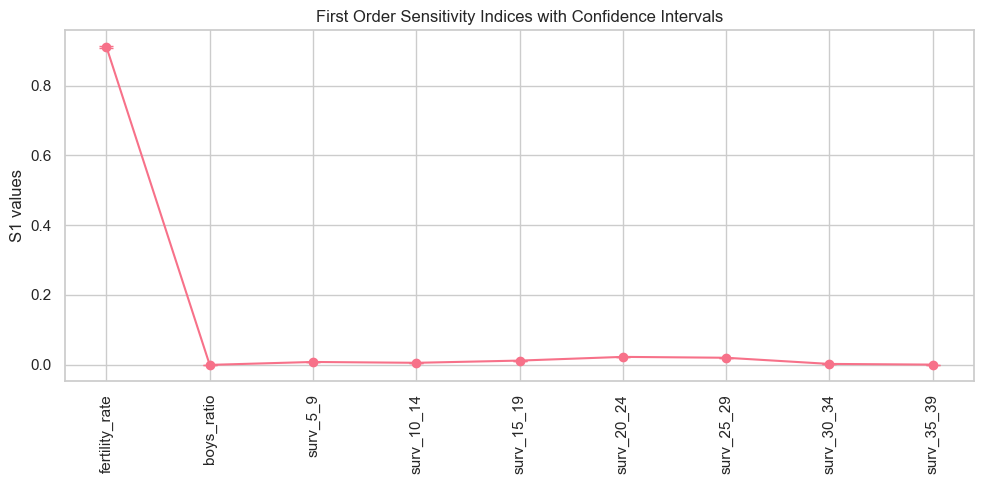

In [443]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have computed S1 indices and their confidence intervals
names = problem['names']
S1 = np.mean(all_S1, axis=0)  # means of S1 values
S1_err = np.std(all_S1, axis=0)  # standard deviations of S1 values

# Creating the plot
plt.figure(figsize=(10, 5))

# Here, we create a sequence of numbers for x axis as matplotlib does not
# handle well categorical variables on x axis in case of line plots.
x = np.arange(len(names))

plt.errorbar(x, S1, yerr=S1_err, fmt='o-', capsize=5)
plt.title('First Order Sensitivity Indices with Confidence Intervals')
plt.ylabel('S1 values')
plt.xticks(x, names, rotation=90)  # Rotate names for readability if necessary
plt.tight_layout()
plt.show()


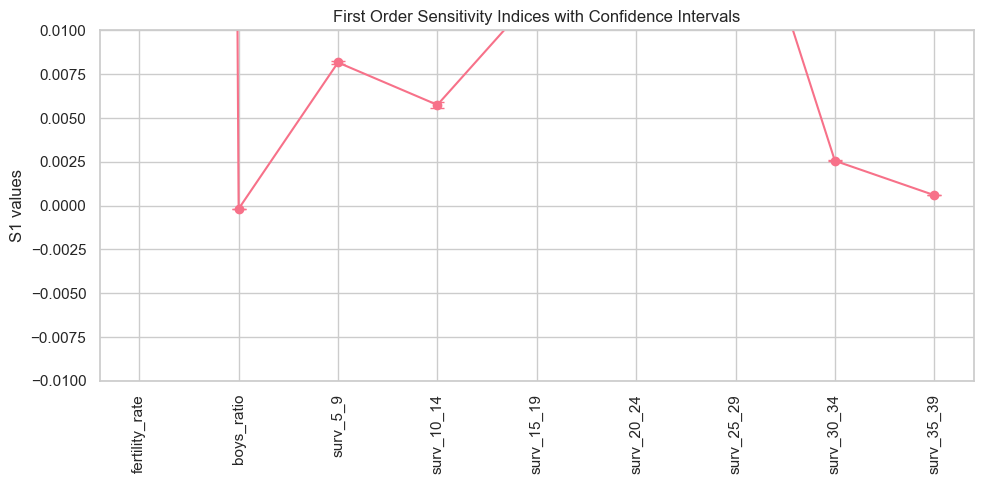

In [444]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Here, I'm assuming that S1_values is a 2D numpy array where each row corresponds
# to a separate run of the Sobol sensitivity analysis, and each column corresponds
# to one of the parameters in problem. Replace it with your actual data.

# Calculate the mean and the 95% confidence interval for each parameter
S1_mean = np.mean(all_S1, axis=0)
S1_confidence_interval = stats.t.interval(0.95, len(all_S1)-1, loc=S1_mean, scale=stats.sem(all_S1))

# The confidence_interval function returns a tuple of arrays, so we take the absolute
# difference with the mean to get the sizes of the error bars
S1_err = np.abs(S1_confidence_interval - S1_mean)

# Plot the results
names = problem['names']
x = np.arange(len(names))
plt.figure(figsize=(10, 5))
plt.errorbar(x, S1_mean, yerr=S1_err, fmt='o-', capsize=5)
plt.title('First Order Sensitivity Indices with Confidence Intervals')
plt.ylabel('S1 values')
plt.ylim(-0.01, 0.01)  # Set y limits to zoom in
plt.xticks(x, names, rotation=90)  # Rotate names for readability if necessary
plt.tight_layout()
plt.show()


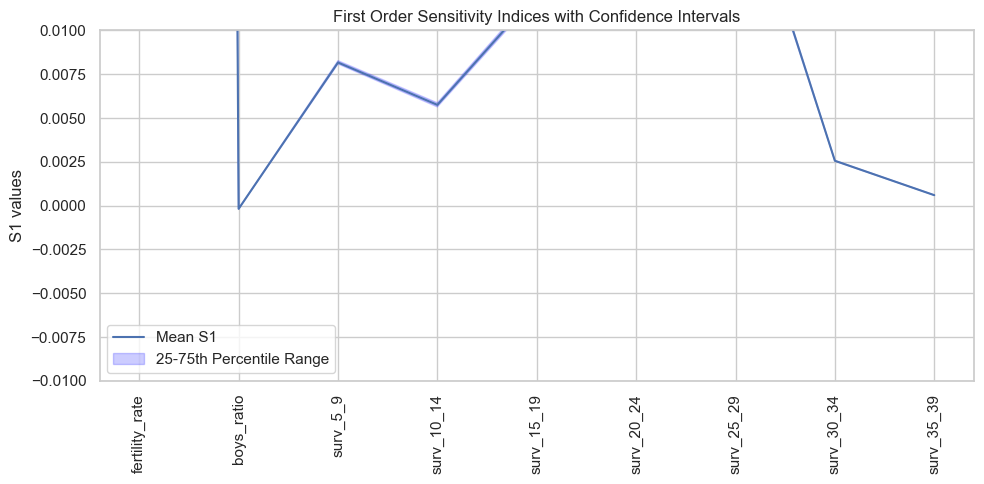

In [445]:
import numpy as np
import matplotlib.pyplot as plt

# Replace with your parameters' names
names = problem['names']

# Compute average, lower and upper bound of S1 values
S1_mean = np.mean(all_S1, axis=0)
S1_lower = np.percentile(all_S1, 25, axis=0)
S1_upper = np.percentile(all_S1, 75, axis=0)

plt.figure(figsize=(10, 5))

# Plot mean line
plt.plot(names, S1_mean, 'b-', label='Mean S1')

# Shade between the lower and upper confidence bounds
plt.fill_between(names, S1_lower, S1_upper, color='blue', alpha=0.2, label='25-75th Percentile Range')

plt.title('First Order Sensitivity Indices with Confidence Intervals')
plt.ylabel('S1 values')
plt.xticks(rotation=90)  # Rotate names for readability if necessary
plt.ylim(-0.01, 0.01)  # Set y limits to zoom in
plt.legend(loc='best')
plt.tight_layout()
plt.show()


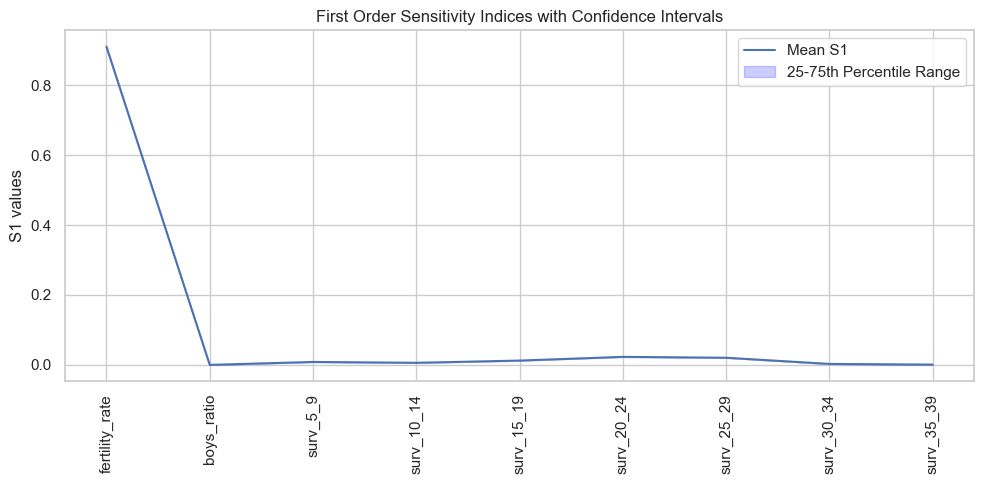

In [446]:
import numpy as np
import matplotlib.pyplot as plt

names = problem['names']

# Compute average, lower and upper bound of S1 values
S1_mean = np.mean(all_S1, axis=0)
S1_lower = np.percentile(all_S1, 25, axis=0)
S1_upper = np.percentile(all_S1, 75, axis=0)

plt.figure(figsize=(10, 5))

# Plot mean line
plt.plot(names, S1_mean, 'b-', label='Mean S1')

# Shade between the lower and upper confidence bounds
plt.fill_between(names, S1_lower, S1_upper, color='blue', alpha=0.2, label='25-75th Percentile Range')

plt.title('First Order Sensitivity Indices with Confidence Intervals')
plt.ylabel('S1 values')
plt.xticks(rotation=90)  # Rotate names for readability if necessary
plt.legend(loc='best')
plt.tight_layout()
plt.show()


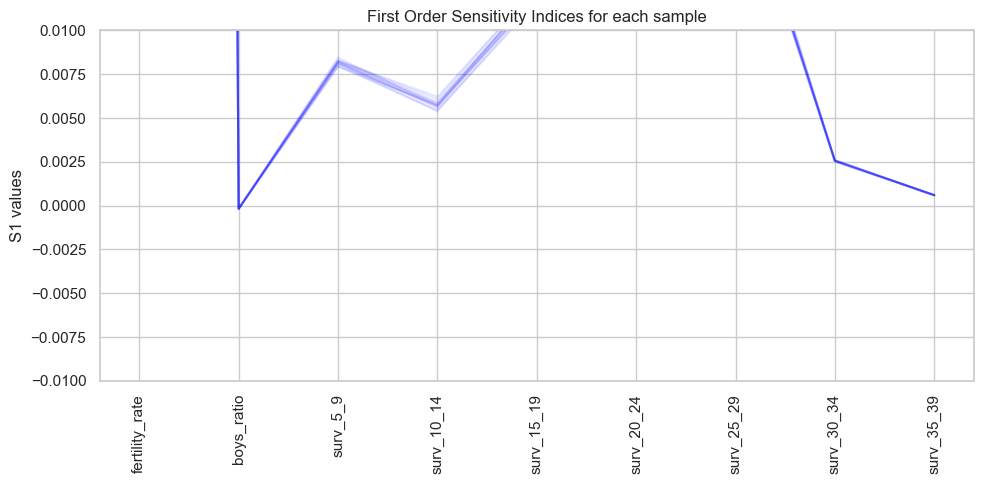

In [447]:
import matplotlib.pyplot as plt

names = problem['names']

plt.figure(figsize=(10, 5))

# Plot each sample
for i in range(all_S1.shape[0]):
    plt.plot(names, all_S1[i, :], alpha=0.1, color='blue')  # set low alpha to see overlapping lines

plt.title('First Order Sensitivity Indices for each sample')
plt.ylabel('S1 values')
plt.xticks(rotation=90)  # Rotate names for readability
plt.ylim(-0.01, 0.01)  # Set y limits to zoom in
plt.tight_layout()
plt.show()


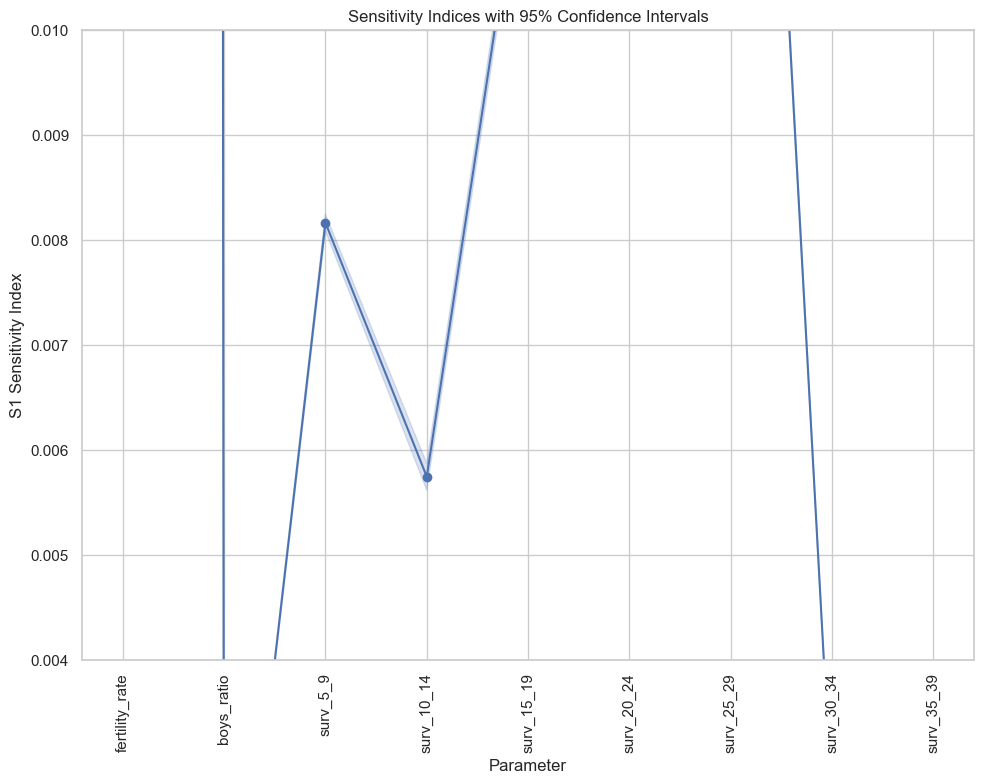

In [453]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate mean and standard deviation
mean_S1 = np.mean(all_S1, axis=0)
std_S1 = np.std(all_S1, axis=0)

# Calculate confidence intervals
ci_upper = mean_S1 + 1.96*std_S1/np.sqrt(all_S1.shape[0])
ci_lower = mean_S1 - 1.96*std_S1/np.sqrt(all_S1.shape[0])

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(names, mean_S1, 'bo-')  # mean values
plt.fill_between(names, ci_lower, ci_upper, color='b', alpha=0.2)  # confidence interval
plt.xlabel('Parameter')
plt.ylabel('S1 Sensitivity Index')
plt.title('Sensitivity Indices with 95% Confidence Intervals')
plt.xticks(rotation='vertical')  # to avoid overlapping names
plt.grid(True)
plt.ylim(0.004, 0.01)
plt.tight_layout()
plt.show()


In [456]:
both_2010_2050_medium_fertility.index

Index([2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050], dtype='int64', name='Year')

In [461]:
both_1950_2005_estimates.index

Index([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005], dtype='int64', name='Year')

In [462]:
population_projections.index

RangeIndex(start=2005, stop=2101, step=5)

In [476]:
# Create a mask for the years where you have both historical data and projections
mask_2010_2050 = (both_2010_2050_medium_fertility.index >= 2010) & (both_2010_2050_medium_fertility.index <= 2050)
mask_population_projections = (population_projections.index >= 2010) & (population_projections.index <= 2050)

# Calculate the errors
errors = population_projections[mask_population_projections] - both_2010_2050_medium_fertility[mask_2010_2050]

# Compute the 70th and 90th percentiles of the absolute errors
quantile_70 = errors.abs().quantile(0.7)
quantile_90 = errors.abs().quantile(0.9)

# Construct 70% confidence intervals
confidence_interval_70 = population_projections - quantile_70
confidence_interval_70_upper = population_projections + quantile_70

# Construct 90% confidence intervals
confidence_interval_90 = population_projections - quantile_90
confidence_interval_90_upper = population_projections + quantile_90


In [477]:
errors['0 - 4'][2010]

-20.667452954193323

In [478]:
# Compute the 70th and 90th percentiles of the absolute errors
quantile_70 = errors.abs().quantile(0.7)
quantile_90 = errors.abs().quantile(0.9)


In [479]:
# Construct 70% confidence intervals
confidence_interval_70 = population_projections - quantile_70
confidence_interval_70_upper = population_projections + quantile_70

# Construct 90% confidence intervals
confidence_interval_90 = population_projections - quantile_90
confidence_interval_90_upper = population_projections + quantile_90


In [482]:
confidence_interval_90

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1432.580598,1517.137208,1617.85042,1650.996219,1633.368723,1580.916692,1666.270766,1735.064195,1751.523652,1686.365924,...,1404.25787,1091.97305,839.972411,643.930067,510.019484,287.675137,44.001968,-74.016922,-65.870696,-19.841652
2010,1431.796145,1469.725183,1546.734417,1666.754944,1750.366967,1751.171252,1650.831298,1711.177074,1763.443274,1765.837803,...,1530.608839,1402.7824,1020.696909,726.271122,498.10617,320.717734,98.671579,-52.272871,-57.027477,-18.371302
2015,1479.344122,1468.927796,1498.788428,1593.859304,1766.938004,1875.588714,1829.553075,1695.231531,1739.095278,1777.865315,...,1680.252611,1525.86487,1316.410854,891.772384,568.871924,311.499055,119.989106,-26.100727,-49.814896,-16.414843
2020,1520.971833,1517.259719,1497.982061,1544.713494,1690.284832,1893.210571,1960.158152,1879.811441,1722.842085,1753.296936,...,1758.813519,1671.637596,1433.515449,1162.577014,711.10743,366.258529,114.041648,-15.895324,-41.133499,-14.819143
2025,1558.146027,1559.573767,1546.858308,1543.886948,1638.605716,1811.696586,1978.656391,2014.697485,1910.983251,1736.896628,...,1770.703162,1748.16626,1572.208278,1269.817363,943.843018,476.322239,149.369881,-18.742569,-37.74833,-12.898485
2030,1561.656748,1597.36087,1589.648905,1593.986295,1637.736564,1756.740338,1893.088496,2033.802059,2048.471765,1926.740736,...,1746.416405,1759.748336,1645.020093,1396.827471,1036.007785,656.416107,220.377802,-1.829779,-38.692771,-12.149556
2035,1548.864568,1600.929473,1627.861573,1637.847702,1690.418369,1755.816071,1835.399127,1945.429423,2067.944939,2065.473713,...,1730.204091,1736.089839,1656.03965,1463.50602,1145.163128,727.734419,336.565882,32.164053,-33.082737,-12.358502
2040,1539.984986,1587.926383,1631.470367,1677.016621,1736.540688,1811.838591,1834.428893,1885.849115,1977.867256,2085.123147,...,1917.872052,1720.296912,1633.530201,1473.597351,1202.468173,812.200264,382.577097,87.787115,-21.806859,-11.117348
2045,1554.630139,1578.900399,1618.320833,1680.715723,1777.728636,1860.885668,1893.237563,1884.847079,1917.137414,1994.230135,...,2055.014761,1903.110203,1618.504305,1452.983973,1211.140889,856.543662,437.070481,109.8142,-3.356485,-8.622691
2050,1581.97742,1593.787013,1609.193197,1667.237129,1781.618415,1904.685471,1944.723884,1945.583377,1916.116046,1932.950603,...,2074.438957,2036.705248,1792.43871,1439.223776,1193.425289,863.254725,465.678753,135.901979,3.949979,-4.54076


In [475]:
both_2010_2050_medium_fertility

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,1546.980,1549.665,1613.325,1723.457,1791.215,1778.882,1700.642,1772.833,1831.398,1836.259,...,1590.048,1425.814,1062.872,809.331,626.636,496.230,301.671,119.975,32.708,5.097
2015,1610.175,1569.680,1563.453,1648.353,1800.051,1883.905,1856.407,1754.726,1805.478,1846.186,...,1739.184,1551.773,1362.429,981.503,705.669,496.480,333.745,155.862,44.002,7.815
2020,1701.028,1632.965,1583.562,1598.766,1725.631,1893.399,1961.862,1910.710,1788.219,1821.455,...,1817.297,1699.511,1486.490,1262.508,860.654,564.401,339.733,177.364,59.307,11.043
2025,1731.351,1723.863,1646.896,1619.024,1676.465,1819.575,1971.841,2016.432,1944.233,1805.053,...,1830.160,1777.981,1631.159,1382.221,1112.843,694.186,391.934,185.204,69.633,15.394
2030,1720.128,1754.246,1737.817,1682.439,1696.956,1770.833,1898.578,2026.864,2050.176,1960.951,...,1808.684,1792.964,1709.710,1521.409,1225.037,905.521,489.288,219.083,75.186,19.133
2035,1696.500,1743.099,1768.241,1773.424,1760.542,1791.599,1850.282,1954.203,2061.128,2067.085,...,1794.882,1774.141,1727.430,1599.153,1354.800,1005.365,647.610,279.994,91.641,21.796
2040,1700.796,1719.552,1757.143,1803.937,1851.670,1855.392,1871.344,1906.396,1989.194,2078.678,...,1949.766,1762.440,1712.334,1620.296,1430.256,1120.349,729.141,379.181,120.526,26.859
2045,1738.965,1723.912,1733.648,1792.942,1882.382,1946.706,1935.372,1927.792,1941.992,2007.715,...,2056.156,1915.838,1703.635,1610.363,1455.624,1191.243,823.019,436.458,167.911,35.748
2050,1789.802,1762.128,1738.046,1769.534,1871.578,1977.641,2026.860,1992.050,1963.767,1961.297,...,2069.874,2022.030,1854.349,1605.797,1452.688,1221.236,885.795,502.896,198.767,50.623


In [473]:
# Check if the UN estimates fall within the 70% confidence intervals
within_70_interval = (un_estimates >= confidence_intervals_70_lower) & (un_estimates <= confidence_intervals_70_upper)

# Check if the UN estimates fall within the 90% confidence intervals
within_90_interval = (un_estimates >= confidence_intervals_90_lower) & (un_estimates <= confidence_intervals_90_upper)


ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects